In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from __future__ import print_function
import numpy as np
from astropy.io import fits
import os
import glob
import json
import matplotlib.pyplot as plt
from astropy.table import Table
from collections import OrderedDict

In [4]:
pattern = "../JPLUS-data/H4-1-phot/*.apdat"
file_list = glob.glob(pattern)

In [5]:
x = [np.loadtxt(file_name,  delimiter = None, converters = None, skiprows = 0, 
                         usecols = None, unpack = False, ndmin = 0,) for file_name in file_list]
x = np.array(x)


In [6]:
T = {"Filter": [file_name.split('-1_')[-1].split('_s')[0] for file_name in file_list], "6.00": x[:,7], 
     "7.00": x[:,8] , "8.00": x[:,9], "9.00": x[:,10], "10.00": x[:,11]}


In [7]:
t = Table(T)

In [8]:
t

7.00,6.00,9.00,Filter,8.00,10.00
float64,float64,float64,str11,float64,float64
20.161,20.191,20.13,J0348_uJAVA,20.141,20.123
17.405,17.436,17.373,J0625_rSDSS,17.387,17.364
19.699,19.735,19.638,J0911_zSDSS,19.666,19.604
17.283,17.312,17.256,J0480_gSDSS,17.265,17.25
21.821,21.871,21.751,J0395,21.777,21.734
19.092,19.121,19.047,J0766_iSDSS,19.065,19.042
21.112,21.135,21.107,J0410,21.096,21.12
21.416,21.426,21.387,J0515,21.41,21.369
20.378,20.414,20.347,J0378,20.357,20.335


In [9]:
t.write("Magnitude-JPLUS-images.dat", format="ascii.tab")


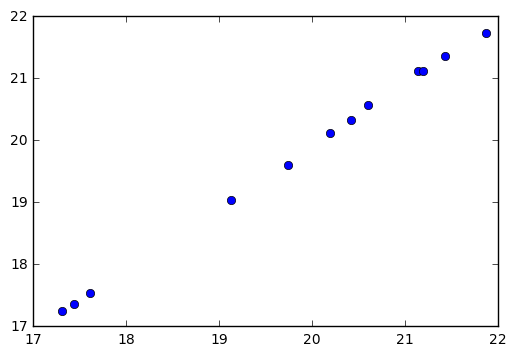

In [10]:
plt.plot(t['6.00'], t['10.00'], 'o')

In [10]:
pattern = "../JPLUS-data/PNG135coadded-phot/*.apdat"
file_list = glob.glob(pattern)

In [11]:
x = [np.loadtxt(file_name,  delimiter = None, converters = None, skiprows = 0, 
                         usecols = None, unpack = False, ndmin = 0,) for file_name in file_list]
x = np.array(x)

In [12]:
T = {"Filter": [file_name.split('ot/')[-1].split('_s')[0] for file_name in file_list], "6.00": x[:,7], 
     "7.00": x[:,8] , "8.00": x[:,9], "9.00": x[:,10], "10.00": x[:,11]}
t = Table(T)

In [13]:
t

7.00,6.00,9.00,Filter,8.00,10.00
float64,float64,float64,str11,float64,float64
21.334,21.358,21.31,J0515,21.33,21.266
21.022,21.077,21.017,J0911_zSDSS,21.014,21.059
21.199,21.227,21.166,J0348_uJAVA,21.168,21.164
21.324,21.326,21.334,J0410,21.339,21.343
19.328,19.352,19.306,J0625_rSDSS,19.303,19.296
21.246,21.259,21.416,J0430,21.332,21.454
19.271,19.317,19.234,J0480_gSDSS,19.246,19.215
20.125,20.141,20.176,J0766_iSDSS,20.146,20.217
21.9,21.931,21.836,J0378,21.882,21.814


# --- Fit line

# H4 1 

In [14]:
#6 pixel aperture
M_s = [16.12, 16.32, 17.99, 18.11]
M_j = [17.312, 17.436, 19.121, 19.735 ]
a = np.polyfit(M_j, M_s, 1)
p = np.poly1d(a)
yfit = p(M_j)
print(a[0], a[1])


0.862507819751 1.26399360875


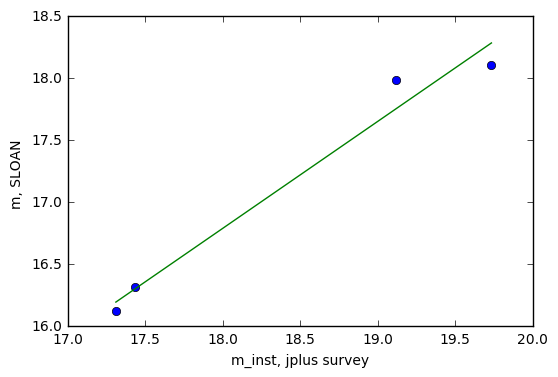

In [15]:
plt.plot(M_j, M_s, 'o'  )
plt.plot(M_j, yfit, '-'  )
plt.xlabel('m_inst, jplus survey')
plt.ylabel('m, SLOAN ')
plt.savefig("H4-1-fit-lineal.jpg")

best fit line:
y = 1.26 + 0.86x


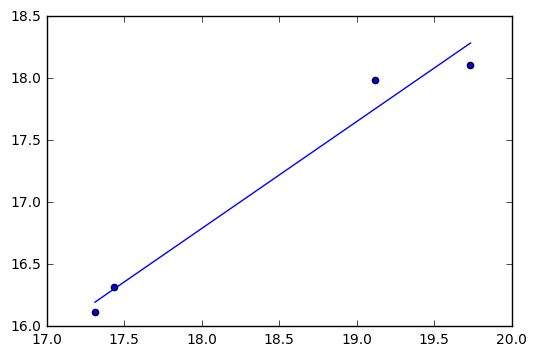

In [16]:
M_s = [16.12, 16.32, 17.99, 18.11]
M_j = [17.312, 17.436, 19.121, 19.735]
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

# solution
a, b = best_fit(M_j, M_s)
#best fit linej
#y = 1.26 + 0.86x

# plot points and fit line
import matplotlib.pyplot as plt
plt.scatter(M_j, M_s)
yfit = [a + b * xi for xi in M_j]
plt.plot(M_j, yfit)


# PNG 135

In [17]:
#6 pixel aperture
M_j1 =[19.317, 19.352, 20.141, 21.077]
M_s1 = [17.95, 18.19, 18.73, 18.98]

best fit line:
y = 7.60 + 0.54x


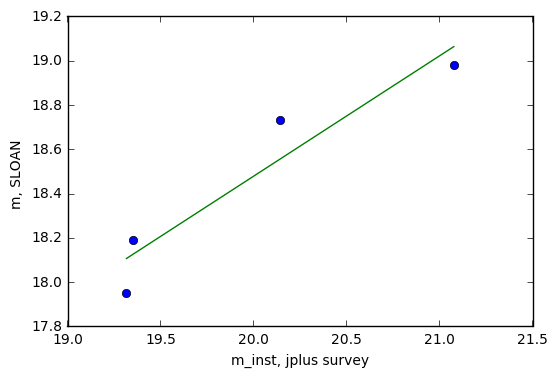

In [20]:
a1 = np.polyfit(M_j1, M_s1, 1)
p1 = np.poly1d(a1)
yfit1 = p1(M_j1)
print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a1[1], a1[0]))
plt.plot(M_j1, M_s1, 'o'  )
plt.plot(M_j1, yfit1, '-')
plt.xlabel('m_inst, jplus survey')
plt.ylabel('m, SLOAN ')
plt.savefig("PNG135-fit-lineal.jpg")

# fit combined dataset

In [21]:
x = np.concatenate((M_j, M_j1))
y = np.concatenate((M_s, M_s1))

best fit line:
y = 2.50 + 0.80x


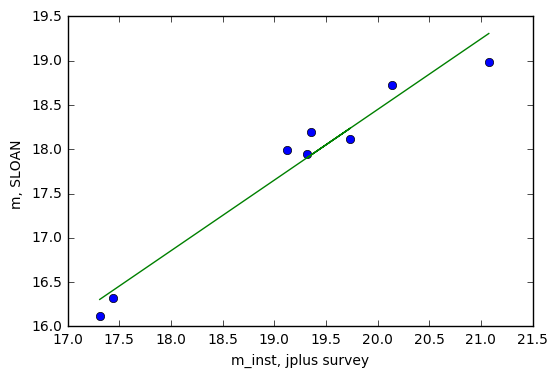

In [22]:
a2 = np.polyfit(x, y, 1)
p2 = np.poly1d(a2)
yfit2 = p2(x)
print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a2[1], a2[0]))
plt.plot(x, y, 'o'  )
plt.plot(x, yfit2, '-'  )
plt.xlabel('m_inst, jplus survey')
plt.ylabel('m, SLOAN ')
plt.savefig("H4-1+PNG135-fit-lineal.jpg")